In [4]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [14]:
# Data structure: [restaurant_id, 2021, 2022, 2023, 2024]
sales_data = np.array([
    [1, 150000, 180000, 220000, 250000],  # Paradise Biryani
    [2, 120000, 140000, 160000, 190000],  # Beijing Bites
    [3, 200000, 230000, 260000, 300000],  # Pizza Hub
    [4, 180000, 210000, 240000, 270000],  # Burger Point
    [5, 160000, 185000, 205000, 230000]   # Chai
])

print("==== Zomato Sales analysis ====")
print("Data Shape: " , sales_data.shape)
print("Sample data of first 3 restraunt:" , sales_data[:3]) #sales_data[0:3]
print("Sample data of first 3 restraunt:" , sales_data[:, 1:])


==== Zomato Sales analysis ====
Data Shape:  (5, 5)
Sample data of first 3 restraunt: [[     1 150000 180000 220000 250000]
 [     2 120000 140000 160000 190000]
 [     3 200000 230000 260000 300000]]
Sample data of first 3 restraunt: [[150000 180000 220000 250000]
 [120000 140000 160000 190000]
 [200000 230000 260000 300000]
 [180000 210000 240000 270000]
 [160000 185000 205000 230000]]


In [21]:
# total sales per year
total_sales_yearly = np.sum(sales_data[:, 1:], axis = 0)
print(total_sales_yearly)

total_sales = np.sum(total_sales_yearly)
print(total_sales)


[ 810000  945000 1085000 1240000]
4080000


In [26]:
# minimum sales per resrauant
min_sales = np.min(sales_data[:, 1:], axis = 1)
print(min_sales)

[150000 120000 200000 180000 160000]


In [27]:
# maximum sales per year
max_sales = np.max(sales_data[:, 1:], axis=0)
print(max_sales)

[200000 230000 260000 300000]


In [28]:
# average sales per restrauents
avg_sales = np.mean(sales_data[:,1:], axis=1)
print(avg_sales)

[200000. 152500. 247500. 225000. 195000.]


[[150000 330000 550000 800000]
 [120000 260000 420000 610000]
 [200000 430000 690000 990000]
 [180000 390000 630000 900000]
 [160000 345000 550000 780000]]
[162000. 351000. 568000. 816000.]


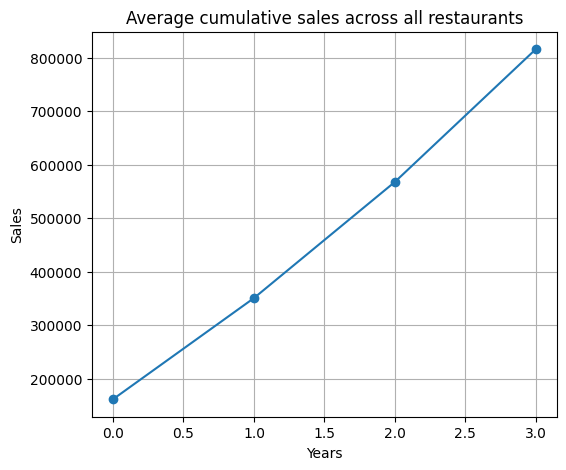

In [39]:
# cumulative sales
cumulative_sales = np.cumsum(sales_data[:, 1:], axis=1)
print(cumulative_sales)

print(np.mean(cumulative_sales, axis=0))
# Plot average cumulative sales across all restaurants
plt.figure(figsize=(6, 5))
plt.plot(np.mean(cumulative_sales, axis=0), marker='o')
plt.title("Average cumulative sales across all restaurants")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

## Notes on NumPy Vector Operations

- **Vector Addition:**  
  Adding two vectors of the same shape adds their elements position-wise.
  ```python
  vector1 = np.array([1,2,3,4,5])
  vector2 = np.array([6,7,8,9,10])
  print("Vector Addition:", vector1 + vector2)
  # Output: [ 7  9 11 13 15 ]
  ```

- **Shape Compatibility:**  
  You can only add, multiply, or perform other element-wise operations if the vectors have the same shape.
  ```python
  print(vector1.shape == vector2.shape)  # Output: True
  ```

- **Element-wise Multiplication:**  
  Multiplies each element of the vectors together.
  ```python
  print("Vector multiplication", vector1 * vector2)
  # Output: [ 6 14 24 36 50 ]
  ```

- **Dot Product:**  
  The sum of the products of corresponding elements.
  ```python
  print("Dot product:", np.dot(vector1, vector2))
  # Output: 130
  ```

- **Angle Between Vectors:**  
  The angle θ between two vectors can be found using the dot product formula:
  \[
  \theta = \arccos\left(\frac{\vec{a} \cdot \vec{b}}{||\vec{a}|| \cdot ||\vec{b}||}\right)
  \]
  ```python
  print("Angle:", np.arccos(np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))))
  # Output: angle in radians
  ```
  - To convert radians to degrees, use

In [45]:
vector1 = np.array([1,2,3,4,5])
vector2 = np.array([6,7,8,9,10])

print("Vector Addition:", vector1+vector2)
print(vector1.shape == vector2.shape)
print("Vector multiplication", vector1*vector2)

print("Dot product:", np.dot(vector1, vector2))

print("Angle:", np.arccos(np.dot(vector1, vector2)/(np.linalg.norm(vector1)*np.linalg.norm(vector2))))

Vector Addition: [ 7  9 11 13 15]
True
Vector multiplication [ 6 14 24 36 50]
Dot product: 130
Angle: 0.26554161733900966


## Notes on Vectorised Operations in NumPy

- **Vectorised Operations:**  
  NumPy allows you to apply a function to each element of an array efficiently without using explicit loops.

- **Example: Converting Strings to Uppercase**  
  You can use `np.vectorize()` to apply the `str.upper` function to every element in a NumPy array of strings.

  ```python
  res_types = np.array(['biryani', 'chainese', 'pizza', 'burger', 'cafe'])
  vectorise_upper = np.vectorize(str.upper)
  print("Vectorise upper: ", vectorise_upper(res_types))
  # Output: ['BIRYANI' 'CHAINESE' 'PIZZA' 'BURGER' 'CAFE']
  ```

- **Explanation:**  
  - `np.vectorize(str.upper)` creates a vectorized version of the `str.upper` method.
  - When called with the array, it returns a new array with all elements converted to uppercase.

In [46]:
# vectorised operations
res_types = np.array(['biryani', 'chainese', 'pizza', 'burger', 'cafe'])
vectorise_upper = np.vectorize(str.upper)
print("Vectorise upper: ", vectorise_upper(res_types))

Vectorise upper:  ['BIRYANI' 'CHAINESE' 'PIZZA' 'BURGER' 'CAFE']


## Notes on Broadcasting in NumPy

- **Broadcasting:**  
  Broadcasting is a powerful feature in NumPy that allows you to perform arithmetic operations on arrays of different shapes. NumPy automatically expands the smaller array so that it matches the shape of the larger array during the operation.

- **Example: Calculating Monthly Average Sales**  
  If you have yearly sales data and want to compute the average monthly sales for each restaurant, you can divide the yearly sales by 12. NumPy broadcasts the division across all elements.

  ```python
  # Assume sales_data[:, 1:] contains yearly sales for each restaurant
  monthly_avg = sales_data[:, 1:] / 12
  print(monthly_avg)
  ```

  - Here, `sales_data[:, 1:]` selects all rows and columns from index 1 onwards (the sales columns).
  - Dividing by 12 is broadcasted to each element, giving the monthly average for each year and restaurant.

- **Output:**  
  The result is a 2D array where each value represents the average monthly sales for a restaurant in a

In [47]:
# broadcast
monthly_avg = sales_data[:,1:] / 12
print(monthly_avg)

[[12500.         15000.         18333.33333333 20833.33333333]
 [10000.         11666.66666667 13333.33333333 15833.33333333]
 [16666.66666667 19166.66666667 21666.66666667 25000.        ]
 [15000.         17500.         20000.         22500.        ]
 [13333.33333333 15416.66666667 17083.33333333 19166.66666667]]
